![img](https://miro.medium.com/max/802/1*u7swL7CrX0UW_lIScu1eDQ.png)
# 1A. Introduction to Machine Learning with H2O-3-Classification

## Installations

In [1]:
# installing java
! apt-get install default-jre
! java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [2]:
# install h2o
! pip install h2o

     |████████████████████████████████| 164.8MB 83kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.1-py2.py3-none-any.whl size=164840229 sha256=f82a5871e0f80d3c6f190dbc451cc0608c7143375d6607170920e1fb4f963f9f
  Stored in directory: /root/.cache/pip/wheels/4d/94/84/02ea21db1eebcef2da872861ce0db478788e27d24bcd5394fb
Successfully built h2o


## Init

In [3]:
import h2o
from h2o.estimators import *
from h2o.grid import *

In [4]:
import os
startup  = '/home/h2o/bin/aquarium_startup'
shutdown = '/home/h2o/bin/aquarium_stop'

if os.path.exists(startup):
    os.system(startup)
    local_url = 'http://localhost:54321/h2o'
    aquarium = True
else:
    local_url = 'http://localhost:54321'
    aquarium = False

In [5]:
h2o.init(url=local_url)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7sogdu7n
  JVM stdout: /tmp/tmp7sogdu7n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7sogdu7n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.1
H2O_cluster_version_age:,1 month and 2 days
H2O_cluster_name:,H2O_from_python_unknownUser_pps85d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
# Downloading the dataset from an AWS S3 instance
loan_level = h2o.import_file("https://s3.amazonaws.com/data.h2o.ai/DAI-Tutorials/loan_level_500k.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


# Some concepts

### Supervised Learnign ► You use an algorithm to try to predict a function between your input and output.

### Binary Classifier ► Model predicts in what two categories(classes) the elements of a given set belong to. (Confusion matrix: TN, FN, FP, TP).

### Precision ► The ratio of correct positive predictions divided by the total number of positive predictions.

### Recall ► Is a metric of the actual positive predictions. It tells us how many correct positive results occurred from all the positive samples available during the test of the model.

### F1 Score ► Measurement of classification accuracy. It represents the harmonic average of precision and recall.

### Accuracy ► Ratio of the number of correct predictions divided by the total number of predictions. In other words, it describes how well the model can correctly identify both the true positives and true negatives.

### Log Loss ► used to evaluate the performance of a binomial or multinomial classifier. Unlike AUC, which looks at how well a model can classify a binary target, logloss evaluates how close a model's predicted values (uncalibrated probability estimates) are to the actual target value.

### Cross-Validation ► Is a model validation technique in which you can check how well a statistical analysis or model, will perform on an independent dataset.

In [7]:
loan_level.head()

CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
669,200206,N,202901,nan,0,1,O,80,33,162000,80,7.12,R,N,FRM,WV,SF,26100,F199Q1000004,P,320,2,Other sellers,Other servicers,TRUE,FALSE
732,199904,N,202903,17140,0,1,O,25,10,53000,25,6.5,R,N,FRM,OH,SF,45200,F199Q1000005,N,360,1,Other sellers,Other servicers,TRUE,FALSE
679,200208,N,202902,15940,30,1,O,91,48,133000,91,6.75,R,N,FRM,OH,SF,44700,F199Q1000007,P,319,1,Other sellers,Other servicers,TRUE,FALSE
721,200209,N,202902,38060,0,1,O,39,13,174000,39,6.625,T,N,FRM,AZ,SF,85200,F199Q1000013,N,318,2,Other sellers,Other servicers,TRUE,FALSE
618,200210,N,202902,10420,25,1,O,85,24,122000,85,6.375,R,N,FRM,OH,SF,44200,F199Q1000015,N,317,2,Other sellers,Other servicers,TRUE,FALSE
738,200211,N,202903,10420,0,1,O,73,44,218000,73,6,R,N,FRM,OH,SF,44300,F199Q1000016,P,317,2,Other sellers,Other servicers,TRUE,FALSE
761,200211,N,202904,nan,0,1,O,73,31,138000,73,6.375,R,N,FRM,SC,PU,29500,F199Q1000017,P,318,2,Other sellers,Other servicers,TRUE,FALSE
707,200211,N,202903,33340,0,1,O,60,57,136000,60,6.25,R,N,FRM,WI,SF,53000,F199Q1000018,C,317,2,Other sellers,Other servicers,TRUE,FALSE
760,200211,N,202903,33340,0,1,O,63,30,79000,63,6.125,R,N,FRM,WI,SF,53000,F199Q1000019,N,317,2,Other sellers,Other servicers,TRUE,FALSE
691,200302,N,202901,15940,0,1,O,65,25,130000,65,5.875,R,N,FRM,OH,SF,44700,F199Q1000023,P,312,2,Other sellers,Other servicers,TRUE,FALSE


In [8]:
loan_level.describe()

Rows:500137
Cols:27




,CREDIT_SCORE,FIRST_PAYMENT_DATE,FIRST_TIME_HOMEBUYER_FLAG,MATURITY_DATE,METROPOLITAN_STATISTICAL_AREA,MORTGAGE_INSURANCE_PERCENTAGE,NUMBER_OF_UNITS,OCCUPANCY_STATUS,ORIGINAL_COMBINED_LOAN_TO_VALUE,ORIGINAL_DEBT_TO_INCOME_RATIO,ORIGINAL_UPB,ORIGINAL_LOAN_TO_VALUE,ORIGINAL_INTEREST_RATE,CHANNEL,PREPAYMENT_PENALTY_MORTGAGE_FLAG,PRODUCT_TYPE,PROPERTY_STATE,PROPERTY_TYPE,POSTAL_CODE,LOAN_SEQUENCE_NUMBER,LOAN_PURPOSE,ORIGINAL_LOAN_TERM,NUMBER_OF_BORROWERS,SELLER_NAME,SERVICER_NAME,PREPAID,DELINQUENT
type,int,int,enum,int,int,int,int,enum,int,int,int,int,real,enum,enum,enum,enum,enum,int,string,enum,int,int,enum,enum,enum,enum
mins,300.0,199901.0,,202402.0,10180.0,0.0,1.0,,6.0,1.0,8000.0,6.0,4.625,,,,,,600.0,NaN,,301.0,1.0,,,,
mean,712.5362124215468,200025.43095191979,,203023.1958723312,30777.82473929504,7.744531707523469,1.0288902574110184,,76.0535707144633,32.91754051870545,136493.48478516805,75.71071405720141,7.182686863799322,,,,,,55490.8571382869,NaN,,359.8554696013299,1.6302946648262713,,,,
maxs,839.0,201103.0,,204101.0,49740.0,55.0,4.0,,180.0,65.0,578000.0,100.0,11.5,,,,,,99900.0,NaN,,362.0,2.0,,,,
sigma,54.79126197408813,109.81554141403225,,110.38418855867243,11333.401144164478,12.04654596949256,0.21839057355939082,,15.139986048512673,11.111799994455248,60968.74306564561,14.937717088968643,0.5799408623980744,,,,,,29505.38225880303,NaN,,1.9082507104186504,0.48272535304031594,,,,
zeros,0,0,,0,0,309979,0,,0,0,0,0,0,,,,,,0,0,,0,0,,,,
missing,2711,0,0,0,70149,51048,3,0,13,14929,0,9,0,0,0,0,0,0,31,0,0,0,247,0,0,0,0
0,669.0,200206.0,N,202901.0,nan,0.0,1.0,O,80.0,33.0,162000.0,80.0,7.12,R,N,FRM,WV,SF,26100.0,F199Q1000004,P,320.0,2.0,Other sellers,Other servicers,TRUE,FALSE
1,732.0,199904.0,N,202903.0,17140.0,0.0,1.0,O,25.0,10.0,53000.0,25.0,6.5,R,N,FRM,OH,SF,45200.0,F199Q1000005,N,360.0,1.0,Other sellers,Other servicers,TRUE,FALSE
2,679.0,200208.0,N,202902.0,15940.0,30.0,1.0,O,91.0,48.0,133000.0,91.0,6.75,R,N,FRM,OH,SF,44700.0,F199Q1000007,P,319.0,1.0,Other sellers,Other servicers,TRUE,FALSE


In [9]:
loan_level.columns

['CREDIT_SCORE',
 'FIRST_PAYMENT_DATE',
 'FIRST_TIME_HOMEBUYER_FLAG',
 'MATURITY_DATE',
 'METROPOLITAN_STATISTICAL_AREA',
 'MORTGAGE_INSURANCE_PERCENTAGE',
 'NUMBER_OF_UNITS',
 'OCCUPANCY_STATUS',
 'ORIGINAL_COMBINED_LOAN_TO_VALUE',
 'ORIGINAL_DEBT_TO_INCOME_RATIO',
 'ORIGINAL_UPB',
 'ORIGINAL_LOAN_TO_VALUE',
 'ORIGINAL_INTEREST_RATE',
 'CHANNEL',
 'PREPAYMENT_PENALTY_MORTGAGE_FLAG',
 'PRODUCT_TYPE',
 'PROPERTY_STATE',
 'PROPERTY_TYPE',
 'POSTAL_CODE',
 'LOAN_SEQUENCE_NUMBER',
 'LOAN_PURPOSE',
 'ORIGINAL_LOAN_TERM',
 'NUMBER_OF_BORROWERS',
 'SELLER_NAME',
 'SERVICER_NAME',
 'PREPAID',
 'DELINQUENT']

### Start Experiment

In [10]:
# 3.6% of the samples in the dataset have been labeled as DELINQUENT.
loan_level["DELINQUENT"].table()

DELINQUENT,Count
FALSE,482146
TRUE,17991


In [11]:
# Splitting data in 3 sets
train, valid, test = loan_level.split_frame([0.7, 0.15], seed=42)

In [12]:
print("train:%d valid:%d test:%d" % (train.nrows, valid.nrows, test.nrows))

train:350268 valid:74971 test:74898


In [13]:
# Defining the columns wich will be used
y = "DELINQUENT"

ignore = ["DELINQUENT", "PREPAID", "PREPAYMENT_PENALTY_MORTGAGE_FLAG", "PRODUCT_TYPE"] 

x = list(set(train.names) - set(ignore))

print(x)

['CREDIT_SCORE', 'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'OCCUPANCY_STATUS', 'PROPERTY_TYPE', 'MATURITY_DATE', 'METROPOLITAN_STATISTICAL_AREA', 'NUMBER_OF_UNITS', 'ORIGINAL_INTEREST_RATE', 'PROPERTY_STATE', 'FIRST_PAYMENT_DATE', 'MORTGAGE_INSURANCE_PERCENTAGE', 'NUMBER_OF_BORROWERS', 'CHANNEL', 'SELLER_NAME', 'ORIGINAL_UPB', 'LOAN_PURPOSE', 'SERVICER_NAME', 'LOAN_SEQUENCE_NUMBER', 'ORIGINAL_LOAN_TO_VALUE', 'ORIGINAL_LOAN_TERM', 'FIRST_TIME_HOMEBUYER_FLAG', 'ORIGINAL_DEBT_TO_INCOME_RATIO', 'POSTAL_CODE']


### Build a GLM

H2O Generalized Linear Model (GLM). A GLM fits a generalized linear model, specified by a response variable, a set of predictors, and a description of the error distribution. Since we have a binomial classification problem, we have to specify the family, in this case, it will be binomial.

In [14]:
# Initializing GLM estimator model
glm = H2OGeneralizedLinearEstimator(family = "binomial", seed = 42, model_id = 'default_glm')

In [15]:
# .train() function to train the model
%time glm.train(x = x, y = y, training_frame = train, validation_frame = valid)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


glm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 202 ms, sys: 14.1 ms, total: 216 ms
Wall time: 7.34 s


In [16]:
# Complete model summary
glm

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  default_glm


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 6.626E-5 )",161,88,7,py_4_sid_b169




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.031421719571328846
RMSE: 0.1772617261885059
LogLoss: 0.12328049878526559
Null degrees of freedom: 350267
Residual degrees of freedom: 350179
Null deviance: 108932.13150369536
Residual deviance: 86362.4274970348
AIC: 86540.4274970348
AUC: 0.8503523971011903
AUCPR: 0.206633488178161
Gini: 0.7007047942023805

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1282670025027246: 


,,FALSE,TRUE,Error,Rate
0,FALSE,321986.0,15621.0,0.0463,(15621.0/337607.0)
1,TRUE,7882.0,4779.0,0.6225,(7882.0/12661.0)
2,Total,329868.0,20400.0,0.0671,(23503.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.128267,0.289102,207.0
1,max f2,0.066290,0.386470,266.0
2,max f0point5,0.216327,0.287980,151.0
3,max accuracy,0.975876,0.963851,0.0
4,max precision,0.554784,0.402597,44.0
5,max recall,0.000572,1.000000,399.0
6,max specificity,0.975876,0.999997,0.0
7,max absolute_mcc,0.108905,0.267492,222.0
8,max min_per_class_accuracy,0.039056,0.771557,307.0
9,max mean_per_class_accuracy,0.034489,0.774192,315.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.315606,10.503740,10.503740,0.379675,0.447135,0.379675,0.447135,0.105047,0.105047,950.373986,950.373986,0.098611
1,2,0.020002,0.231615,7.763290,9.133515,0.280617,0.268426,0.330146,0.357781,0.077640,0.182687,676.329044,813.351515,0.168786
2,3,0.030003,0.189186,6.175883,8.147638,0.223237,0.209056,0.294509,0.308206,0.061764,0.244451,517.588314,714.763781,0.222491
3,4,0.040001,0.160763,5.340267,7.445946,0.193033,0.174289,0.269146,0.274734,0.053392,0.297844,434.026745,644.594550,0.267513
4,5,0.050002,0.140680,4.470013,6.850725,0.161576,0.150204,0.247630,0.249826,0.044704,0.342548,347.001260,585.072494,0.303517
5,6,0.100001,0.087297,3.363160,5.106992,0.121567,0.109556,0.184600,0.179693,0.168154,0.510702,236.316030,410.699240,0.426104
6,7,0.150002,0.062777,2.337808,4.183913,0.084504,0.073795,0.151234,0.144393,0.116894,0.627597,133.780791,318.391334,0.495505
7,8,0.200001,0.048144,1.679211,3.557756,0.060698,0.054923,0.128601,0.122026,0.083959,0.711555,67.921061,255.775553,0.530738
8,9,0.300002,0.031478,1.149192,2.754901,0.041539,0.038923,0.099580,0.094325,0.114920,0.826475,14.919176,175.490094,0.546217
9,10,0.399999,0.021718,0.625557,2.222576,0.022612,0.026218,0.080339,0.077298,0.062554,0.889029,-37.444271,122.257643,0.507370




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.03107511759141766
RMSE: 0.17628135917168797
LogLoss: 0.12274529844188314
Null degrees of freedom: 74970
Residual degrees of freedom: 74882
Null deviance: 22974.597464485523
Residual deviance: 18404.67553897284
AIC: 18582.67553897284
AUC: 0.8450464412102321
AUCPR: 0.19801886666651378
Gini: 0.6900928824204642

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12627867037192236: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68868.0,3445.0,0.0476,(3445.0/72313.0)
1,TRUE,1649.0,1009.0,0.6204,(1649.0/2658.0)
2,Total,70517.0,4454.0,0.0679,(5094.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126279,0.283746,201.0
1,max f2,0.062995,0.373455,264.0
2,max f0point5,0.229837,0.290515,135.0
3,max accuracy,0.964445,0.964533,0.0
4,max precision,0.395160,0.398104,76.0
5,max recall,0.000762,1.000000,398.0
6,max specificity,0.964445,0.999986,0.0
7,max absolute_mcc,0.123640,0.260018,204.0
8,max min_per_class_accuracy,0.038583,0.766742,300.0
9,max mean_per_class_accuracy,0.032769,0.767428,311.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.62 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.317794,10.417340,10.417340,0.369333,0.455618,0.369333,0.455618,0.104214,0.104214,941.733985,941.733985,0.097673
1,2,0.020008,0.234316,8.273700,9.345520,0.293333,0.270835,0.331333,0.363227,0.082769,0.186983,727.369952,834.551969,0.173112
2,3,0.030012,0.187723,6.430921,8.373987,0.228000,0.208398,0.296889,0.311617,0.064334,0.251317,543.092099,737.398679,0.229440
3,4,0.040002,0.159223,4.481294,7.401787,0.158879,0.172164,0.262421,0.276789,0.044771,0.296087,348.129435,640.178718,0.265498
4,5,0.050006,0.139193,4.287281,6.778720,0.152000,0.149074,0.240331,0.251239,0.042889,0.338977,328.728066,577.871972,0.299592
5,6,0.100012,0.087251,3.197509,4.988115,0.113364,0.109587,0.176847,0.180413,0.159895,0.498871,219.750930,398.811451,0.413520
6,7,0.150005,0.062508,2.325398,4.100700,0.082444,0.073822,0.145385,0.144889,0.116253,0.615124,132.539762,310.070006,0.482216
7,8,0.200011,0.048269,1.722893,3.506209,0.061083,0.054932,0.124308,0.122398,0.086155,0.701279,72.289325,250.620872,0.519694
8,9,0.300009,0.031184,1.124921,2.712481,0.039883,0.038895,0.096168,0.094565,0.112491,0.813770,12.492095,171.248142,0.532645
9,10,0.400008,0.021592,0.665923,2.200859,0.023609,0.026053,0.078029,0.077438,0.066591,0.880361,-33.407690,120.085890,0.498009




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-04-28 01:31:12,0.000 sec,0,54466.065752,0.155498,,,,,,,,,,,,,,
1,,2021-04-28 01:31:13,1.198 sec,1,50061.613368,0.144447,,,,,,,,,,,,,,
2,,2021-04-28 01:31:14,1.593 sec,2,43570.207802,0.125483,,,,,,,,,,,,,,
3,,2021-04-28 01:31:14,1.963 sec,3,43215.311321,0.124491,,,,,,,,,,,,,,
4,,2021-04-28 01:31:15,2.319 sec,4,43195.943426,0.124463,,,,,,,,,,,,,,
5,,2021-04-28 01:31:15,2.694 sec,5,43195.779638,0.124463,,,,,,,,,,,,,,
6,,2021-04-28 01:31:16,3.483 sec,6,43182.000891,0.124441,,,,,,,,,,,,,,
7,,2021-04-28 01:31:16,3.848 sec,7,43181.213749,0.124441,0.177262,0.12328,0.0981145,0.850352,0.206633,10.5037,0.0671,0.176281,0.122745,0.0912843,0.845046,0.198019,10.4173,0.0679463



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,"SERVICER_NAME.WELLSFARGOBANK,NA",1.525186,1.000000,0.055449
1,"SERVICER_NAME.JPMORGANCHASEBANK,NA",1.310670,0.859351,0.047651
2,"SERVICER_NAME.CITIMORTGAGE,INC",1.147234,0.752193,0.041709
3,SERVICER_NAME.CHASEHOMEFINANCELLC,0.789225,0.517462,0.028693
4,PROPERTY_STATE.CA,0.722806,0.473913,0.026278
5,SERVICER_NAME.Other servicers,0.710362,0.465754,0.025826
6,CREDIT_SCORE,0.673536,0.441609,0.024487
7,SELLER_NAME.BISHOPSGATERESIDENTI,0.651131,0.426919,0.023672
8,SERVICER_NAME.NATLCITYMTGECO,0.597233,0.391581,0.021713
9,"SELLER_NAME.FIRSTARBANK,NA",0.581422,0.381214,0.021138



See the whole table with table.as_data_frame()


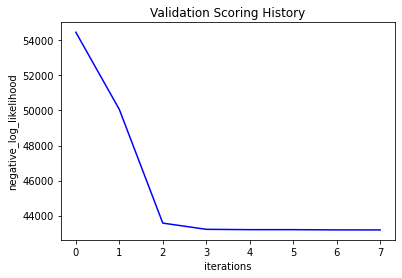

In [17]:
# Scoring history of our model
glm.plot(metric='negative_log_likelihood')

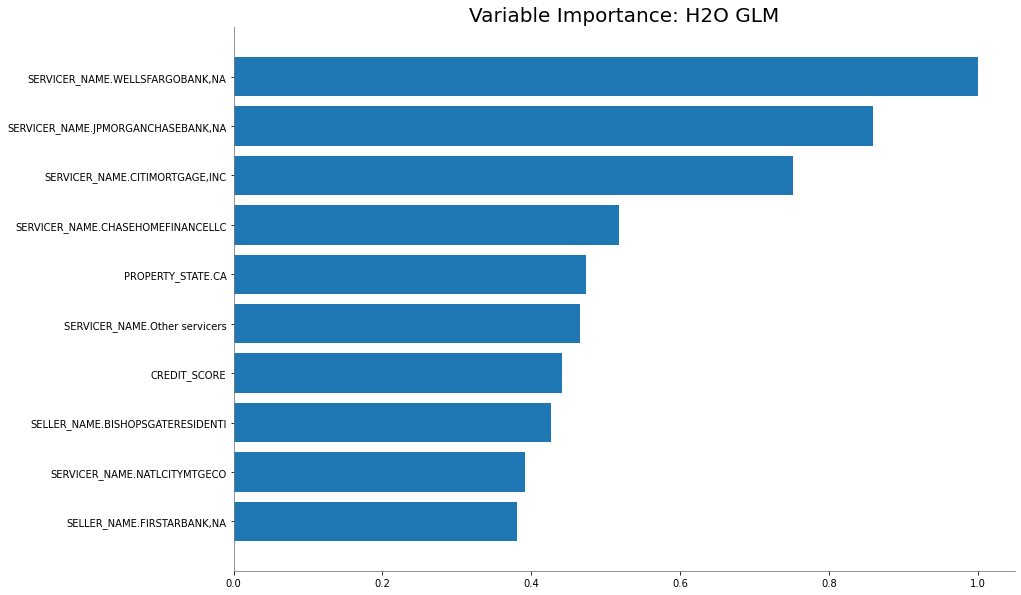

In [18]:
# Inputs importance
glm.varimp_plot()

In [19]:
# Printing individual metrics AUC
glm.accuracy()

[[0.9758761624564709, 0.9638505373028652]]

In [20]:
# Take a look at the first ten predictions of our model
glm.predict(valid).head(10)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.994227,0.00577262
FALSE,0.997196,0.00280374
FALSE,0.964314,0.0356865
FALSE,0.996098,0.0039019
FALSE,0.996148,0.00385171
TRUE,0.646653,0.353347
FALSE,0.994166,0.00583412
FALSE,0.995727,0.00427344
FALSE,0.958063,0.0419368
FALSE,0.994599,0.005401


In [21]:
# Saving model performance
default_glm_perf=glm.model_performance(valid)

In [22]:
print(default_glm_perf.auc())

0.8450464412102321


### Distributed Random Forest (DRF) 

DRF generates a forest of classification or regression trees, rather than a single classification or regression tree. Each of these trees is a weak learner built on a subset of rows and columns. More trees will reduce the variance. Both classification and regression take the average prediction over all of their trees to make a final prediction, whether predicting for a class or numeric value.

In [23]:
rf = H2ORandomForestEstimator (seed = 42, 
                               model_id = 'default_rf')

%time rf.train(x = x, y = y, training_frame = train, validation_frame = valid)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 1.36 s, sys: 104 ms, total: 1.47 s
Wall time: 1min 17s


In [24]:
# Model summary
rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  default_rf


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,7598180.0,20.0,20.0,20.0,9881.0,11724.0,10834.34




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.03217049865504154
RMSE: 0.1793613633284536
LogLoss: 0.18808040483623167
Mean Per-Class Error: 0.26910942081145595
AUC: 0.8034365546707388
AUCPR: 0.19880274803695155
Gini: 0.6068731093414776

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1714152473716729: 


,,FALSE,TRUE,Error,Rate
0,FALSE,322404.0,15203.0,0.045,(15203.0/337607.0)
1,TRUE,8458.0,4203.0,0.668,(8458.0/12661.0)
2,Total,330862.0,19406.0,0.0676,(23661.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.171415,0.262139,194.0
1,max f2,0.088095,0.345659,266.0
2,max f0point5,0.291459,0.272684,125.0
3,max accuracy,0.570928,0.964273,43.0
4,max precision,0.998148,1.000000,0.0
5,max recall,0.000007,1.000000,399.0
6,max specificity,0.998148,1.000000,0.0
7,max absolute_mcc,0.151393,0.234703,209.0
8,max min_per_class_accuracy,0.037451,0.727541,330.0
9,max mean_per_class_accuracy,0.013768,0.730891,360.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  3.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.355807,10.811744,10.811744,0.390808,0.468185,0.390808,0.468185,0.108127,0.108127,981.174427,981.174427,0.101806
1,2,0.020002,0.276656,6.547068,8.679406,0.236654,0.311273,0.313731,0.389729,0.065477,0.173604,554.706793,767.940610,0.159363
2,3,0.030003,0.232143,5.172894,7.510569,0.186983,0.252600,0.271482,0.344019,0.051734,0.225338,417.289444,651.056888,0.202660
3,4,0.040001,0.202677,4.408091,6.735115,0.159338,0.217047,0.243452,0.312283,0.044072,0.269410,340.809059,573.511538,0.238013
4,5,0.050002,0.180995,4.011955,6.190452,0.145019,0.191749,0.223764,0.288175,0.040123,0.309533,301.195477,519.045216,0.269264
5,6,0.100218,0.117647,2.944402,4.563960,0.106430,0.144611,0.164972,0.216240,0.147856,0.457389,194.440231,356.395953,0.370566
6,7,0.150002,0.081530,2.086227,3.741617,0.075410,0.098156,0.135247,0.177049,0.103862,0.561251,108.622686,274.161694,0.426672
7,8,0.202559,0.062500,1.498295,3.159555,0.054158,0.070321,0.114207,0.149357,0.078746,0.639997,49.829529,215.955480,0.453843
8,9,0.300002,0.030525,1.059398,2.477410,0.038294,0.049436,0.089550,0.116902,0.103230,0.743227,5.939771,147.740996,0.459847
9,10,0.399999,0.008321,0.906742,2.084751,0.032776,0.016276,0.075357,0.091746,0.090672,0.833899,-9.325786,108.475142,0.450172




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.03071157490750522
RMSE: 0.17524718230974562
LogLoss: 0.13267563440956423
Mean Per-Class Error: 0.24861547353029934
AUC: 0.826378639356413
AUCPR: 0.2236693606654231
Gini: 0.652757278712826

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1855035085498162: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70080.0,2233.0,0.0309,(2233.0/72313.0)
1,TRUE,1851.0,807.0,0.6964,(1851.0/2658.0)
2,Total,71931.0,3040.0,0.0545,(4084.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.185504,0.283257,164.0
1,max f2,0.092517,0.365133,245.0
2,max f0point5,0.288050,0.307828,107.0
3,max accuracy,0.507947,0.965133,43.0
4,max precision,0.996667,1.000000,0.0
5,max recall,0.000013,1.000000,399.0
6,max specificity,0.996667,1.000000,0.0
7,max absolute_mcc,0.185504,0.255698,164.0
8,max min_per_class_accuracy,0.041619,0.747931,312.0
9,max mean_per_class_accuracy,0.043816,0.751385,308.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  3.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,0.325072,12.372942,12.372942,0.438667,0.439038,0.438667,0.439038,0.123777,0.123777,1137.294156,1137.294156,0.117955
1,2,0.020008,0.248567,7.070252,9.721597,0.250667,0.282077,0.344667,0.360557,0.070730,0.194507,607.025232,872.159694,0.180913
2,3,0.030012,0.210902,5.716374,8.386523,0.202667,0.228056,0.297333,0.316390,0.057186,0.251693,471.637422,738.652270,0.229830
3,4,0.040002,0.185958,4.933190,7.524053,0.174900,0.197849,0.266756,0.286785,0.049285,0.300978,393.318958,652.405304,0.270569
4,5,0.050006,0.166226,3.723165,6.763673,0.132000,0.175703,0.239797,0.264562,0.037246,0.338224,272.316479,576.367262,0.298812
5,6,0.100012,0.107784,3.069609,4.916641,0.108829,0.133063,0.174313,0.198813,0.153499,0.491723,206.960893,391.664078,0.406109
6,7,0.150005,0.077850,2.016850,3.950216,0.071505,0.091579,0.140050,0.163074,0.100828,0.592551,101.684972,295.021566,0.458813
7,8,0.200011,0.059189,1.497187,3.336918,0.053081,0.066814,0.118306,0.139008,0.074868,0.667419,49.718671,233.691752,0.484589
8,9,0.300009,0.033730,1.087298,2.587078,0.038549,0.044971,0.091722,0.107663,0.108728,0.776147,8.729817,158.707775,0.493639
9,10,0.400008,0.021259,0.714833,2.119032,0.025343,0.025871,0.075128,0.087216,0.071482,0.847630,-28.516729,111.903210,0.464075




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-04-28 01:32:37,0.085 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-04-28 01:32:42,4.188 sec,1.0,0.238486,1.772648,0.579630,0.068566,4.199508,0.074234,0.235348,1.725575,0.585285,0.071755,4.582604,0.070080
2,,2021-04-28 01:32:48,11.104 sec,5.0,0.215222,1.074432,0.622662,0.086922,5.021408,0.087262,0.187744,0.433595,0.718994,0.145652,9.138677,0.060063
3,,2021-04-28 01:33:05,27.788 sec,17.0,0.188311,0.416351,0.729076,0.142141,8.496752,0.072041,0.178403,0.195225,0.794089,0.193561,10.966929,0.062504
4,,2021-04-28 01:33:27,49.233 sec,33.0,0.181617,0.248146,0.779093,0.181369,10.306301,0.073247,0.176088,0.146561,0.815949,0.215254,11.884041,0.056969
5,,2021-04-28 01:33:51,1 min 13.473 sec,50.0,0.179361,0.188080,0.803437,0.198803,10.811744,0.067551,0.175247,0.132676,0.826379,0.223669,12.372942,0.054474



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,PROPERTY_STATE,42236.546875,1.000000,0.134475
1,CREDIT_SCORE,38299.613281,0.906788,0.121940
2,SELLER_NAME,31417.185547,0.743839,0.100028
3,SERVICER_NAME,25920.623047,0.613701,0.082527
4,ORIGINAL_DEBT_TO_INCOME_RATIO,23534.988281,0.557219,0.074932
5,ORIGINAL_UPB,23414.837891,0.554374,0.074549
6,METROPOLITAN_STATISTICAL_AREA,20642.494141,0.488735,0.065723
7,ORIGINAL_INTEREST_RATE,20437.968750,0.483893,0.065071
8,ORIGINAL_LOAN_TO_VALUE,13487.042969,0.319322,0.042941
9,POSTAL_CODE,12512.929688,0.296258,0.039839



See the whole table with table.as_data_frame()


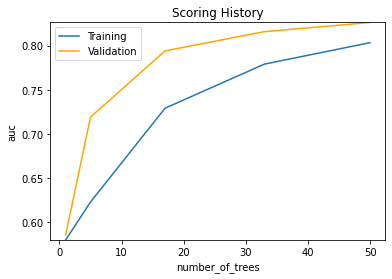

In [25]:
# Scoring plot
rf.plot(metric = 'auc')

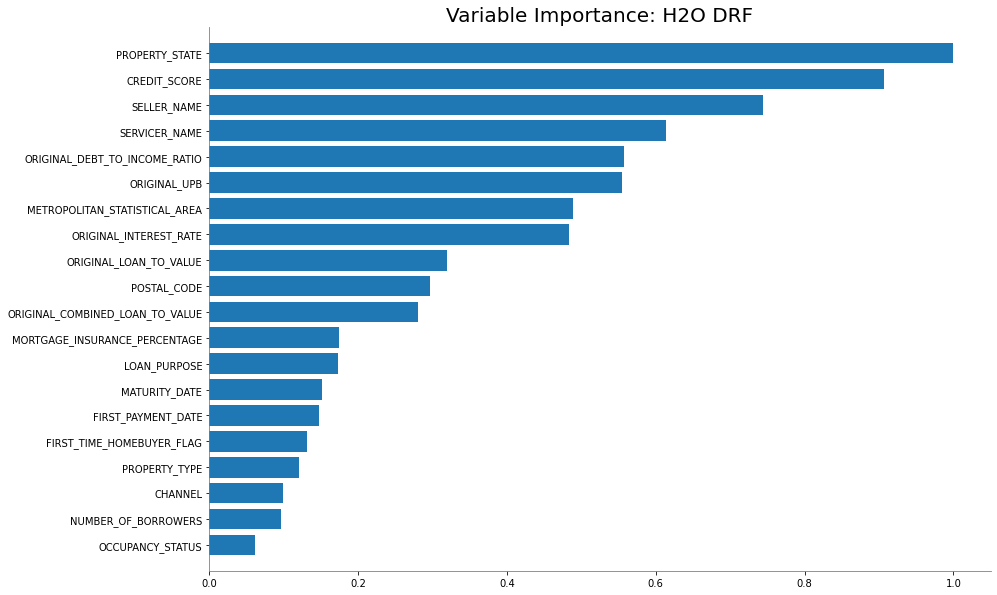

In [26]:
# Variable importance
rf.varimp_plot(20)

In [27]:
# Calling the F1 score indicator
rf.F1()

[[0.1714152473716729, 0.2621386472074095]]

In [28]:
# Comparing predictions with the first model
rf.predict(valid)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.89606,0.10394
FALSE,0.989924,0.0100759
FALSE,0.99179,0.00820961
FALSE,0.994186,0.005814
FALSE,0.999108,0.00089201
TRUE,0.726028,0.273972
FALSE,0.999971,2.88916e-05
FALSE,0.999835,0.000164608
FALSE,0.847452,0.152548
FALSE,1,0


In [29]:
# Saving model performance
default_rf_per = rf.model_performance(valid)

### Build a GBM

Gradient Boosting Machine (for Regression and Classification) is a forward learning ensemble method. H2O's GBM sequentially builds classification trees on all the features of the dataset in a fully distributed way - each tree is built in parallel.

In [30]:
# Defining and summarizing the model
gbm = H2OGradientBoostingEstimator(seed = 42, 
                                   model_id = 'default_gbm')

%time gbm.train(x = x, y = y, training_frame = train, validation_frame = valid)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 728 ms, sys: 55.1 ms, total: 783 ms
Wall time: 35 s


In [31]:
# Predictions
gbm.predict(valid)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,FALSE,TRUE
FALSE,0.978372,0.0216281
FALSE,0.995024,0.00497636
FALSE,0.964645,0.0353549
FALSE,0.99305,0.00694996
FALSE,0.99217,0.0078297
TRUE,0.591272,0.408728
FALSE,0.993899,0.00610064
FALSE,0.995599,0.00440117
FALSE,0.950489,0.0495107
FALSE,0.992925,0.00707464


In [32]:
# Save the model performance.
default_gbm_per = gbm.model_performance(valid)

### Tune the GLM with H2O GridSearch

H2O supports two types of grid search – traditional (or "cartesian") grid search and random grid search.

Cartesian ► you specify a set of values for each hyperparameter that you want to search over, and H2O will train a model for every combination of the hyperparameter values. This means that if you have three hyperparameters and you specify 5, 10, and 2 values for each, your grid will contain a total of 5*10*2 = 100 models.

Random ► you specify the hyperparameter space in the exact same way, except H2O will sample uniformly from the set of all possible hyperparameter value combinations.

In [33]:
glm_grid = h2o.grid.H2OGridSearch (
    
    H2OGeneralizedLinearEstimator(family = "binomial",
                                  lambda_search = True),
    
    hyper_params = {"alpha": [x*0.01 for x in range(0, 100)],
                    "missing_values_handling" : ["Skip", "MeanImputation"]},
    
    grid_id = "glm_random_grid",
    
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":300,
        "max_runtime_secs":300,
        "seed":42})

%time glm_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 3.36 s, sys: 262 ms, total: 3.62 s
Wall time: 5min 2s


In [34]:
# Print the models in descending order, sorted by the AUC.
sorted_glm_grid = glm_grid.get_grid(sort_by = 'auc', decreasing = True)
sorted_glm_grid.sorted_metric_table()

,,alpha,missing_values_handling,model_ids,auc
0,,[0.44],Skip,glm_random_grid_model_3,0.8533995870569479
1,,[0.33],Skip,glm_random_grid_model_2,0.8533701061733173
2,,[0.12],Skip,glm_random_grid_model_1,0.8533524253745624
3,,[0.32],Skip,glm_random_grid_model_6,0.8521702762491681
4,,[0.93],MeanImputation,glm_random_grid_model_4,0.8460909739458545
5,,[0.92],MeanImputation,glm_random_grid_model_5,0.8460514282358992


In [35]:
# Retrieve the best model and print the model summary with the following code
tuned_glm = sorted_glm_grid.models[0]
tuned_glm.summary()


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.44, lambda = 1.095E-5 )","nlambda = 100, lambda.max = 0.07549, lambda.min = 1.095E-5, lambda...",161,145,143,py_4_sid_b169


In [36]:
# Evaluate the model performance on the validation set.
tuned_glm_perf = tuned_glm.model_performance(valid)

In [37]:
# Print the AUC for the deffault
print("Default GLM AUC: %.4f \nTuned GLM AUC:%.4f" % (default_glm_perf.auc(), tuned_glm_perf.auc()))

Default GLM AUC: 0.8450 
Tuned GLM AUC:0.8534


In [38]:
# Fi score
print ("Default GLM F1 Score:", default_glm_perf.F1())
print ("Tuned GLM F1 Score", tuned_glm_perf.F1())

Default GLM F1 Score: [[0.12627867037192236, 0.28374578177727783]]
Tuned GLM F1 Score [[0.1256805797039998, 0.2827599172776838]]


In [39]:
# Take a look at the confusion matrix to see if the values changed.
print ("Default GLM: ", default_glm_perf.confusion_matrix())
print ("Tuned GLM: ",  tuned_glm_perf.confusion_matrix())

Default GLM:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12627867037192236: 


,,FALSE,TRUE,Error,Rate
0,FALSE,68868.0,3445.0,0.0476,(3445.0/72313.0)
1,TRUE,1649.0,1009.0,0.6204,(1649.0/2658.0)
2,Total,70517.0,4454.0,0.0679,(5094.0/74971.0)



Tuned GLM:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1256805797039998: 


,,FALSE,TRUE,Error,Rate
0,FALSE,51030.0,2639.0,0.0492,(2639.0/53669.0)
1,TRUE,1176.0,752.0,0.61,(1176.0/1928.0)
2,Total,52206.0,3391.0,0.0686,(3815.0/55597.0)


Notice how the overall error slightly improved, as well as the error for the FALSE class. While the error for the TRUE class had minimal increase, meaning the model is classifying a few more samples that are actually TRUE incorrectly. We see that our model has a hard time classifying the TRUE labels, and this is due to the highly imbalanced dataset that we are working with.

### Tune the RF model with H2O GridSearch

We are going to define each parameter of the grid search separately, and then pass the variables to the grid search function.

In [40]:
#Grid Search Parameters
hyper_parameters = {'max_depth':[1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 15, 20, 25, 35]}

rf = H2ORandomForestEstimator(seed = 42,
                              stopping_rounds = 5, 
                              stopping_tolerance = 1e-4, 
                              stopping_metric = "auc",
                              model_id = 'rf')

grid_id = 'depth_grid'

search_criteria = {'strategy': "Cartesian"}

#Grid Search
rf_grid = H2OGridSearch(model = rf, 
                        hyper_params = hyper_parameters, 
                        grid_id = grid_id, 
                        search_criteria = search_criteria)

%time rf_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

drf Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 4.83 s, sys: 369 ms, total: 5.2 s
Wall time: 8min 33s


In [41]:
# Models sorted by AUC.
sorted_rf_depth = rf_grid.get_grid(sort_by = 'auc',decreasing = True)
sorted_rf_depth.sorted_metric_table()

,,max_depth,model_ids,auc
0,,10,depth_grid_model_8,0.8483202339274679
1,,12,depth_grid_model_9,0.8475205427762891
2,,9,depth_grid_model_7,0.8472289965689974
3,,13,depth_grid_model_10,0.8469513389648796
4,,8,depth_grid_model_6,0.8452958845813425
5,,15,depth_grid_model_11,0.8430497704585108
6,,7,depth_grid_model_5,0.842491713428259
7,,6,depth_grid_model_4,0.8368467831461335
8,,5,depth_grid_model_3,0.8311638705648987
9,,20,depth_grid_model_12,0.826378639356413


In [42]:
# Random grid search using the top five values for max_depth and we will also try to tune our sample_rate.
hyper_parameters = {"max_depth":[8, 9, 10, 11, 12],
                    'sample_rate': [x/100. for x in range(20,101)]}

rf = H2ORandomForestEstimator(ntrees = 500,
                              seed = 42,
                              stopping_rounds = 5, 
                              stopping_tolerance = 1e-3, 
                              stopping_metric = "auc",
                              model_id = 'rf_grid')

grid_id = 'rf_random_grid'

search_criteria = {"strategy":"RandomDiscrete",
                   "max_models":100,
                   "max_runtime_secs":900,
                   "seed":42}

rf_grid = H2OGridSearch(model = rf, 
                        hyper_params = hyper_parameters, 
                        grid_id = grid_id, 
                        search_criteria = search_criteria)

%time rf_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)


drf Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 8.74 s, sys: 668 ms, total: 9.41 s
Wall time: 15min 5s


In [43]:
# Print grid results
sorted_rf = rf_grid.get_grid(sort_by = 'auc', decreasing = True)
sorted_rf.sorted_metric_table()

,,max_depth,sample_rate,model_ids,auc
0,,12,0.51,rf_random_grid_model_1,0.8534059938019006
1,,11,0.35,rf_random_grid_model_3,0.8513094988774502
2,,9,0.38,rf_random_grid_model_4,0.8483613248388254
3,,8,0.42,rf_random_grid_model_2,0.847036200177231


In [44]:
# Check some of the outputs that we obtained from our tuned model.
tuned_rf = sorted_rf.models[0]

In [45]:
# validation AUC:
tuned_rf_per = tuned_rf.model_performance(valid)
tuned_rf_per.auc()

0.8534059938019006

In [46]:
# F1 Score
tuned_rf_per.F1()

[[0.13867185846269128, 0.3052023121387283]]

In [47]:
# Tuned model VS deffault model
print("Default RF AUC: %.4f \nTuned RF AUC:%.4f" % (default_rf_per.auc(), tuned_rf_per.auc()))

Default RF AUC: 0.8264 
Tuned RF AUC:0.8534


In [48]:
# F1 score comparison
print("Default RF F1 Score:", default_rf_per.F1())
print("Tuned RF F1 Score:", tuned_rf_per.F1())

Default RF F1 Score: [[0.1855035085498162, 0.2832572832572833]]
Tuned RF F1 Score: [[0.13867185846269128, 0.3052023121387283]]


In [49]:
# Improvement on the confusion matrix
print ("Default RF: ", default_rf_per.confusion_matrix())
print ("Tuned RF: ",  tuned_rf_per.confusion_matrix())

Default RF:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1855035085498162: 


,,FALSE,TRUE,Error,Rate
0,FALSE,70080.0,2233.0,0.0309,(2233.0/72313.0)
1,TRUE,1851.0,807.0,0.6964,(1851.0/2658.0)
2,Total,71931.0,3040.0,0.0545,(4084.0/74971.0)



Tuned RF:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13867185846269128: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69840.0,2473.0,0.0342,(2473.0/72313.0)
1,TRUE,1734.0,924.0,0.6524,(1734.0/2658.0)
2,Total,71574.0,3397.0,0.0561,(4207.0/74971.0)


The AUC for our tuned model actually improved, as well as the F1 Score. From the confusion matrix, we can see that the new model is predicting fewer FALSE labels that are actually FALSE; this means the model is classifying more FALSE labels incorrectly. However, the error is very small and this can still be accepted. On the other side, we can see that our model started to correclty classify more TRUE labels. Remember that we have a highly imbalanced dataset, and with the quick grid search we were able to improve the missclassification error for the minority class.

### Tune the GBM model with H2O GridSearch.



In [50]:
hyper_params = {'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15]}

gbm = H2OGradientBoostingEstimator(model_id = 'grid_gbm', 
                                   ntrees = 50,
                                   seed = 42)

gbm_grid = H2OGridSearch(gbm, hyper_params,
                         grid_id = 'depth_gbm_grid',
                         search_criteria = {"strategy":"Cartesian"})

%time gbm_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 5.49 s, sys: 508 ms, total: 6 s
Wall time: 10min 15s


In [51]:
sorted_gbm_depth = gbm_grid.get_grid(sort_by = 'auc', decreasing = True)
sorted_gbm_depth.sorted_metric_table()


,,max_depth,model_ids,auc
0,,6,depth_gbm_grid_model_4,0.8545357753508993
1,,5,depth_gbm_grid_model_3,0.8541002080486222
2,,7,depth_gbm_grid_model_5,0.8529009496662141
3,,8,depth_gbm_grid_model_6,0.8512531640600055
4,,4,depth_gbm_grid_model_2,0.8512081321046683
5,,9,depth_gbm_grid_model_7,0.8497842446208027
6,,3,depth_gbm_grid_model_1,0.8476725422091533
7,,10,depth_gbm_grid_model_8,0.8449705260376477
8,,12,depth_gbm_grid_model_9,0.8346376914245702
9,,13,depth_gbm_grid_model_10,0.8323679024230184


In [52]:
# random grid search with a few parameters to see if we can get a better score.
gbm = H2OGradientBoostingEstimator(ntrees = 500,
                                   learn_rate = 0.05,
                                   seed = 42,
                                   model_id = 'grid_gbm')

hyper_params_tune = {'max_depth' : [4, 5, 6, 7, 8],
                     'sample_rate': [x/100. for x in range(20,101)],
                     'col_sample_rate' : [x/100. for x in range(20,101)],
                     'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                     'col_sample_rate_change_per_level': [x/100. for x in range(90,111)]}

search_criteria_tune = {'strategy': "RandomDiscrete",
                        'max_runtime_secs': 900,  
                        'max_models': 100,  ## build no more than 100 models
                        'seed' : 42}

random_grid = H2OGridSearch(model = gbm, hyper_params = hyper_params_tune,
                            grid_id = 'random_grid',
                            search_criteria = search_criteria_tune)

%time random_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 8.85 s, sys: 700 ms, total: 9.55 s
Wall time: 15min 1s


In [53]:
sorted_random_search = random_grid.get_grid(sort_by = 'auc',decreasing = True)
sorted_random_search.sorted_metric_table()

,,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,max_depth,sample_rate,model_ids,auc
0,,0.74,1.0,0.31,5,0.59,random_grid_model_5,0.8609029182007734
1,,0.28,1.09,0.9,7,0.82,random_grid_model_1,0.8592531685759477
2,,0.22,1.02,0.29,7,0.68,random_grid_model_8,0.8591408423191478
3,,0.88,0.95,0.2,7,0.38,random_grid_model_6,0.8588541242159
4,,0.94,0.97,0.51,8,0.54,random_grid_model_3,0.8587939133882045
5,,0.5,0.9,0.21,4,0.51,random_grid_model_7,0.8574221985631251
6,,1.0,0.94,0.87,7,0.51,random_grid_model_4,0.8571062595047445
7,,0.62,1.02,0.95,8,0.96,random_grid_model_2,0.8558140184979025
8,,0.6,1.06,0.9,8,0.79,random_grid_model_9,0.8494703866417516


In [54]:
tuned_gbm = sorted_random_search.models[0]

In [55]:
tuned_gbm_per = tuned_gbm.model_performance(valid)
print(tuned_gbm_per.auc())
print(tuned_gbm_per.F1())

0.8609029182007734
[[0.16324755573013605, 0.3127946127946128]]


In [56]:
tuned_gbm_per.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16324755573013605: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69960.0,2353.0,0.0325,(2353.0/72313.0)
1,TRUE,1729.0,929.0,0.6505,(1729.0/2658.0)
2,Total,71689.0,3282.0,0.0544,(4082.0/74971.0)


In [57]:
print("Default GBM AUC: %.4f \nTuned GBM AUC:%.4f" % (default_gbm_per.auc(), tuned_gbm_per.auc()))

Default GBM AUC: 0.8541 
Tuned GBM AUC:0.8609


Even though the misclassification error for the TRUE class improved, the error for the FALSE class and the overall error did not improve. However, with the tuning that we did, our GBM model was able to make more correct predictions for the TRUE class, which is good since we are dealing with a highly imbalanced dataset.

### Test Set Performance

We are going to obtain the test performance of each of the best models.

In [58]:
glm_test_per = tuned_glm.model_performance(test)
rf_test_per = tuned_rf.model_performance(test)
gbm_test_per = tuned_gbm.model_performance(test)

In [59]:
# Print the test AUC of each model.
print("GLM Test AUC: %.4f \nRF Test AUC: %.4f \nGBM Test AUC: %.4f " % 
      (glm_test_per.auc(), rf_test_per.auc(), gbm_test_per.auc()))

GLM Test AUC: 0.8549 
RF Test AUC: 0.8574 
GBM Test AUC: 0.8648 


In [60]:
# F1 Score for each model.
print ("GLM Test F1 Score: ", glm_test_per.F1())
print ("RF Test F1 Score: ",  rf_test_per.F1())
print ("GBM Test F1 Score: ",  gbm_test_per.F1())

GLM Test F1 Score:  [[0.14354746471876623, 0.28654848800834204]]
RF Test F1 Score:  [[0.12837261568123026, 0.2966507177033493]]
GBM Test F1 Score:  [[0.15492987464852406, 0.30719690871035266]]


In [61]:
# Confusion matrix for each model
print ("GLM Confusion Matrix: ", glm_test_per.confusion_matrix())
print ("RF Confusion Matrix: ",  rf_test_per.confusion_matrix())
print ("GBM Confusion Matrix ",  gbm_test_per.confusion_matrix())

GLM Confusion Matrix:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14354746471876623: 


,,FALSE,TRUE,Error,Rate
0,FALSE,51468.0,2122.0,0.0396,(2122.0/53590.0)
1,TRUE,1299.0,687.0,0.6541,(1299.0/1986.0)
2,Total,52767.0,2809.0,0.0616,(3421.0/55576.0)



RF Confusion Matrix:  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12837261568123026: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69202.0,3024.0,0.0419,(3024.0/72226.0)
1,TRUE,1680.0,992.0,0.6287,(1680.0/2672.0)
2,Total,70882.0,4016.0,0.0628,(4704.0/74898.0)



GBM Confusion Matrix  
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15492987464852406: 


,,FALSE,TRUE,Error,Rate
0,FALSE,69641.0,2585.0,0.0358,(2585.0/72226.0)
1,TRUE,1718.0,954.0,0.643,(1718.0/2672.0)
2,Total,71359.0,3539.0,0.0575,(4303.0/74898.0)


Again, all three scores are very close to each other, but the best one is the GBM, second the GLM, and lastly, our RF. Although we see the largest error for the RF tuned model, we see that this model is the one that was able to better score the TRUE class, getting an even better score than the GBM, which is based on the other scores, our best model. The GBM had the best overall misclassification error as well as the best misclassification error for the FALSE class.

Note: We can't really compared the confusion matrix of our GLM as it has less total samples. This is a known issue to H2O and the team is already working on this issue.

For this dataset, we obtained a good AUC for all three models. We obtained an okay F1 Score, given that our dataset is highly imbalanced, and we also obtained a good overall misclassification error, although due to the given imbalanced data, the error for the TRUE label was not so low. Overall, The best model trained on our dataset was the GBM, followed by the RF, and lastly, the GLM.

### Challenge

After building three models, you are now familiar with the syntax of H2O-3 models. Now, try to build a Naive Bayes Classifier! You can do a 5 minutes grid search for laplace, min_prob, and eps_prob. Try it and see what's the best training, validation, and test AUC that you can get with the Naive Bayes Classifier and compare it to the models that we built in this tutorial. Please keep in mind that the results might not improve by much, so do not spend too much time with this model. We just want you to feel more comfortable initializing models and doing grid searches. If you need more time with your lab, download your results, and restart the lab.

In [63]:
# Build and train the model:
pros_nb = H2ONaiveBayesEstimator(laplace=0,
                                 nfolds=5,
                                 seed=1234)
%time pros_nb.train(x=x, y=y, training_frame = train, validation_frame = valid)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:200: RuntimeWarning: Dropping bad and constant columns: [LOAN_SEQUENCE_NUMBER]
  warnings.warn(mesg["message"], RuntimeWarning)


naivebayes Model Build progress: |████████████████████████████████████████| 100%
CPU times: user 597 ms, sys: 43.1 ms, total: 640 ms
Wall time: 18.9 s


In [64]:
pros_nb

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1619572961696_1013


Model Summary: 


,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.035848,0.964152




ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.05440177485567775
RMSE: 0.2332418805782481
LogLoss: 0.21386724637361104
Mean Per-Class Error: 0.25971690235690725
AUC: 0.8083522538155948
AUCPR: 0.1664817299393177
Gini: 0.6167045076311897

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46418952165159716: 


,,FALSE,TRUE,Error,Rate
0,FALSE,319015.0,18592.0,0.0551,(18592.0/337607.0)
1,TRUE,8151.0,4510.0,0.6438,(8151.0/12661.0)
2,Total,327166.0,23102.0,0.0764,(26743.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.464190,0.252216,148.0
1,max f2,0.224491,0.346252,237.0
2,max f0point5,0.781939,0.244371,56.0
3,max accuracy,0.999396,0.963399,0.0
4,max precision,0.950571,0.341324,12.0
5,max recall,0.000048,1.000000,399.0
6,max specificity,0.999396,0.999428,0.0
7,max absolute_mcc,0.328675,0.229436,195.0
8,max min_per_class_accuracy,0.071936,0.738370,323.0
9,max mean_per_class_accuracy,0.066086,0.740283,327.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  9.73 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,8.884050e-01,8.916333,8.916333,0.322295,0.947531,0.322295,0.947531,0.089171,0.089171,791.633256,791.633256,0.082140
1,2,0.020002,7.814739e-01,6.744507,7.830420,0.243791,0.833967,0.283043,0.890749,0.067451,0.156623,574.450665,683.041961,0.141744
2,3,0.030003,6.942865e-01,5.386128,7.015656,0.194690,0.736880,0.253592,0.839459,0.053866,0.210489,438.612826,601.565582,0.187255
3,4,0.040001,6.174187e-01,4.502888,6.387598,0.162764,0.654720,0.230890,0.793285,0.045020,0.255509,350.288824,538.759843,0.223590
4,5,0.050002,5.513029e-01,4.256779,5.961410,0.153868,0.583745,0.215485,0.751374,0.042572,0.298081,325.677879,496.141017,0.257383
5,6,0.100001,3.259444e-01,3.140424,4.550957,0.113516,0.426934,0.164502,0.589159,0.157018,0.455098,214.042399,355.095735,0.368415
6,7,0.150002,2.042855e-01,2.151415,3.751095,0.077766,0.259437,0.135589,0.479249,0.107574,0.562673,115.141512,275.109472,0.428147
7,8,0.200001,1.329201e-01,1.644457,3.224450,0.059442,0.165563,0.116553,0.400830,0.082221,0.644894,64.445743,222.445043,0.461577
8,9,0.300002,6.081646e-02,1.172097,2.540332,0.042367,0.091672,0.091824,0.297777,0.117210,0.762104,17.209662,154.033249,0.479432
9,10,0.399999,2.920253e-02,0.754302,2.093834,0.027265,0.043005,0.075685,0.234086,0.075428,0.837533,-24.569796,109.383444,0.453942




ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.0542717715753535
RMSE: 0.23296302619805037
LogLoss: 0.20949218418606522
Mean Per-Class Error: 0.26042546605537464
AUC: 0.8069785264973998
AUCPR: 0.15870521318046835
Gini: 0.6139570529947995

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.397898170566428: 


,,FALSE,TRUE,Error,Rate
0,FALSE,67338.0,4975.0,0.0688,(4975.0/72313.0)
1,TRUE,1609.0,1049.0,0.6053,(1609.0/2658.0)
2,Total,68947.0,6024.0,0.0878,(6584.0/74971.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.397898,0.241649,166.0
1,max f2,0.174798,0.340189,259.0
2,max f0point5,0.709228,0.243803,71.0
3,max accuracy,0.999063,0.964106,0.0
4,max precision,0.943930,0.315403,13.0
5,max recall,0.000041,1.000000,399.0
6,max specificity,0.999063,0.999461,0.0
7,max absolute_mcc,0.277156,0.223994,214.0
8,max min_per_class_accuracy,0.072031,0.738747,321.0
9,max mean_per_class_accuracy,0.068176,0.739575,324.0



Gains/Lift Table: Avg response rate:  3.55 %, avg score:  9.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010004,8.880329e-01,8.461738,8.461738,0.300000,0.946493,0.300000,0.946493,0.084650,0.084650,746.173815,746.173815,0.077390
1,2,0.020008,7.766839e-01,7.183075,7.822407,0.254667,0.830750,0.277333,0.888622,0.071859,0.156509,618.307550,682.240682,0.141518
2,3,0.030012,6.902131e-01,5.227474,6.957429,0.185333,0.732995,0.246667,0.836746,0.052295,0.208804,422.747379,595.742914,0.185364
3,4,0.040002,6.125088e-01,3.878767,6.188534,0.137517,0.650534,0.219406,0.790240,0.038751,0.247555,287.876738,518.853362,0.215181
4,5,0.050006,5.486124e-01,3.948811,5.740470,0.140000,0.579574,0.203521,0.748095,0.039503,0.287058,294.881114,474.046964,0.245765
5,6,0.100012,3.256110e-01,3.122274,4.431372,0.110696,0.424669,0.157109,0.586382,0.156132,0.443190,212.227379,343.137172,0.355793
6,7,0.150005,2.016846e-01,2.272719,3.711949,0.080576,0.258032,0.131602,0.476952,0.113619,0.556810,127.271871,271.194868,0.421758
7,8,0.200011,1.322246e-01,1.813176,3.237224,0.064284,0.164309,0.114772,0.398786,0.090670,0.647479,81.317586,223.722382,0.463916
8,9,0.300009,5.997296e-02,1.109872,2.528138,0.039349,0.091110,0.089632,0.296232,0.110986,0.758465,10.987184,152.813802,0.475307
9,10,0.400008,2.904627e-02,0.797603,2.095519,0.028278,0.042617,0.074294,0.232830,0.079759,0.838224,-20.239719,109.551865,0.454324




ModelMetricsBinomial: naivebayes
** Reported on cross-validation data. **

MSE: 0.055173190056993233
RMSE: 0.2348897402122818
LogLoss: 0.21553204691793842
Mean Per-Class Error: 0.26038055947270156
AUC: 0.8070993395836112
AUCPR: 0.16490612267691873
Gini: 0.6141986791672225

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4876057823357156: 


,,FALSE,TRUE,Error,Rate
0,FALSE,319976.0,17631.0,0.0522,(17631.0/337607.0)
1,TRUE,8328.0,4333.0,0.6578,(8328.0/12661.0)
2,Total,328304.0,21964.0,0.0741,(25959.0/350268.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.487606,0.250282,137.0
1,max f2,0.200892,0.344357,249.0
2,max f0point5,0.714071,0.241590,70.0
3,max accuracy,0.999042,0.963391,0.0
4,max precision,0.953469,0.343915,11.0
5,max recall,0.000056,1.000000,399.0
6,max specificity,0.999042,0.999378,0.0
7,max absolute_mcc,0.340061,0.227927,191.0
8,max min_per_class_accuracy,0.073737,0.738804,320.0
9,max mean_per_class_accuracy,0.082408,0.739619,314.0



Gains/Lift Table: Avg response rate:  3.61 %, avg score:  9.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,8.916724e-01,8.797869,8.797869,0.318013,0.948863,0.318013,0.948863,0.087987,0.087987,779.786933,779.786933,0.080910
1,2,0.020002,7.887294e-01,6.547068,7.672469,0.236654,0.838688,0.277334,0.893776,0.065477,0.153463,554.706793,667.246863,0.138467
2,3,0.030003,7.005187e-01,5.512489,6.952475,0.199258,0.742898,0.251308,0.843483,0.055130,0.208593,451.248904,595.247543,0.185288
3,4,0.040001,6.242772e-01,4.376491,6.308617,0.158195,0.661411,0.228035,0.797975,0.043756,0.252350,337.649137,530.861731,0.220312
4,5,0.050002,5.588995e-01,4.240984,5.895067,0.153297,0.590727,0.213087,0.756523,0.042414,0.294763,324.098369,489.506697,0.253941
5,6,0.100001,3.313438e-01,3.157801,4.526473,0.114144,0.433137,0.163617,0.594835,0.157886,0.452650,215.780058,352.647285,0.365874
6,7,0.150002,2.083301e-01,2.145097,3.732666,0.077538,0.263940,0.134923,0.484534,0.107259,0.559908,114.509672,273.266570,0.425278
7,8,0.200001,1.358078e-01,1.655515,3.213393,0.059841,0.168937,0.116153,0.405637,0.082774,0.642682,65.551526,221.339291,0.459283
8,9,0.300002,6.206905e-02,1.168148,2.531644,0.042225,0.093569,0.091510,0.301615,0.116815,0.759498,16.814750,153.164444,0.476728
9,10,0.399999,2.973417e-02,0.758251,2.088306,0.027408,0.043895,0.075485,0.237186,0.075823,0.835321,-24.174874,108.830564,0.451647




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.92450625,0.0052902717,0.92473793,0.926885,0.91588104,0.93013597,0.9248913
1,auc,0.80746055,0.0031089305,0.80657524,0.80357957,0.81219244,0.80701697,0.80793864
2,aucpr,0.16607206,0.004947404,0.17042413,0.15926531,0.17008513,0.16806015,0.16252558
3,err,0.07549376,0.0052902717,0.07526208,0.07311499,0.08411895,0.06986406,0.07510874
4,err_count,5289.0,377.503,5284.0,5119.0,5898.0,4877.0,5267.0
5,f0point5,0.2159819,0.0072230115,0.21244273,0.21407354,0.21222977,0.22883172,0.21233176
6,f1,0.25232828,0.0055268873,0.25007096,0.24620822,0.25680444,0.25937736,0.24918033
7,f2,0.30390236,0.013009978,0.3038979,0.28969437,0.32508135,0.29933405,0.30150408
8,lift_top_group,8.974543,0.5390037,9.813962,8.355681,8.829931,8.777369,9.095767
9,logloss,0.21554221,0.0265908,0.19816484,0.26227966,0.20031163,0.20622687,0.21072811



See the whole table with table.as_data_frame()


In [65]:
# grid searching. laplace, min_prob, and eps_prob

pros_nb = H2ONaiveBayesEstimator(laplace=0,
                                 nfolds=5,
                                 seed=1234)
#%time pros_nb.train(x=x, y=y, training_frame = train, validation_frame = valid)

hyper_params_nb = {'laplace':[1,2], 'min_prob':[0.1,0.2], 'eps_prob':[0.5,0.6]}

nb_grid = H2OGridSearch(model = pros_nb, hyper_params = hyper_params_nb)

%time nb_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

naivebayes Grid Build progress: |█████████████████████████████████████████| 100%
CPU times: user 1.54 s, sys: 114 ms, total: 1.65 s
Wall time: 1min 18s


In [66]:
# Improvement on the confusion matrix
print ("Default RF: ", pros_nb.confusion_matrix())
print ("Tuned RF: ",  nb_grid.confusion_matrix())

AttributeError: ignored